# > 합성곱 신경망 <

합성곱 신경망은 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용된다. <br>
대표적으로 이미지 분류, 객체 탐지, 스타일 전이 등을 예로 들 수 있다.<br>

- 이미지 분류 <br>
고양이 또는 강아지 사진으로 모델을 학습시키면, 모델은 **이미지의 특징을 추출해** 고양이 또는 강아지를 분류할 수 있게 된다. 즉, 이미지를 인식할 수 있는 능력을 모델이 갖추게 된다.

- 객체 탐지 사례 <br>
이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술이다. 고양이 이미지의 위치에 표시된 노란색 실선을 경계 박스라고 부른다. 인식한 객체가 어떤 클래스에 속하는지 분류 확률고 ㅏ예측을 함께 알려준다. 일반적으로 객체의 위치는 이미지의 좌표 값으로 나타내기 때문에, 경계 박스를 찾는 문제는 회귀 분석으로 해결한다. 반면 클래스를 예측하는 문제는 분류 문제가 된다

- 스타일 전이 <br>
콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술을 말한다

### > 이미지 표현

이미지 또는 영상을 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 한다. <br>
왼쪽에 있는 손글씨 이미지는 오른쪽 그림과 같이 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현할 수 있다<br>
0은 검은색, 255는 흰색을 나타낸다 <br>

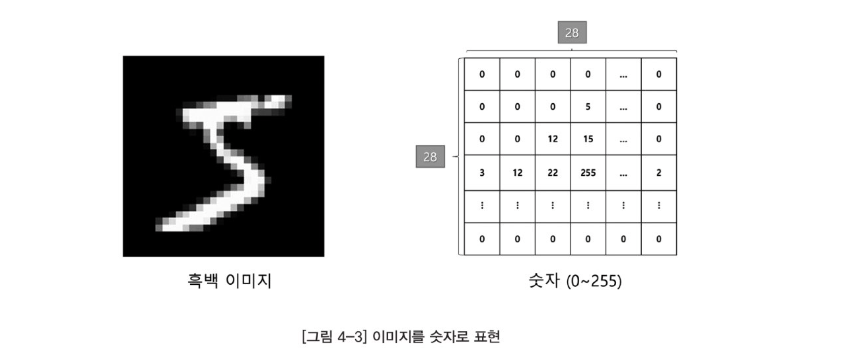

In [73]:
from IPython.display import Image
Image("/Users/ijiseon/Desktop/이미지표현.png")

컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현한다. <br>
각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타낸다. <br>
숫자가 클수록 해당 색상을 더 강하게 표현한다.  <br>
여기서 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식이다. <br>


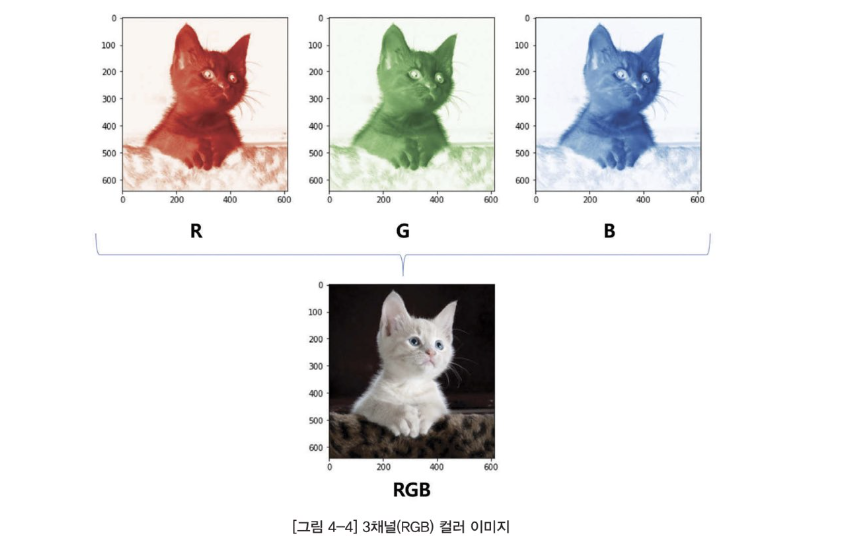

In [74]:
Image("/Users/ijiseon/Desktop/색깔.png")

### > 합성곱

합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법을 말한다. 합성곱 연산을 통해서 추출된 이미지를 특성맵(feature map)이라고 부른다. 이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보인다.

[그림 4-5]는 이미지에 필터를 적용하는 합성곱 연산을 설명하고 있다. 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력된다. 즉, 세로 5픽셀, 가로 5픽셀의 크기를 가지는 이미지는 (5, 5)의 shape을 가진다. 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해준다. 이렇게 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행하게 된다.

예를 들어, 3 x 3 사이즈를 가지는 커널이 첫 좌측 상단의 입력 이미지의 3 x 3 부분과 매칭되어 합성곱 연산을 수행한다. 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나온다. 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측 상단의 첫 번째 값이 된다(다음 그림에서는 스칼라 값 20이 좌측 상단에 입력된다).


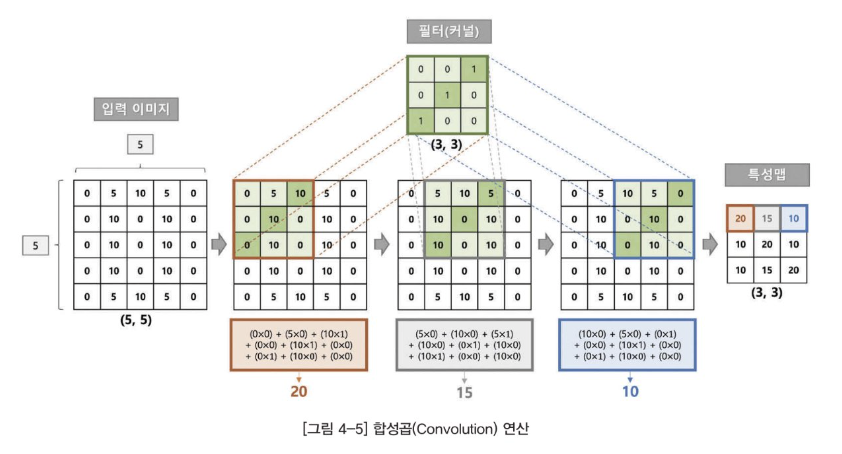

In [75]:
Image("/Users/ijiseon/Desktop/합성곱연산.png")

커널 사이즈가 3x3인 경우 총 9개의 가중치(weight)를 가지며 오차 역전파(backpropagation) 시 커널의 가중치를 업데이트한다. 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치(shared weights) 때문이다. 오차 역전파 시 커널의 그래디언트(gradient)를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점이 있다.

### > 채널 

채널은 입력 이미지를 구성하는 2차원 배열의 개수를 나타낸다. 앞서 살펴본 것처럼 흑백 이미지는 단일 채널, 즉 채널의 개수가 1개인 이미지다. 하지만 컬러 이미지의 경우 R, G, B 3개의 채널을 가지는 이미지이므로 Red, Green, Blue 채널 이미지 3장이 겹쳐서 컬러 이미지로 표현된다. 컬러 이미지는 3개의 채널을 가지므로 앞서 언급한 세로 5픽셀, 가로 5픽셀의 컬러 이미지를 shape으로 나타냈을 때는 (5, 5, 3)으로 표현된다.

컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성 맵의 생성 과정을 잘 살펴봐야 한다. 우선 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행한다. 이 과정을 거치면 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성 맵이 생성된다.


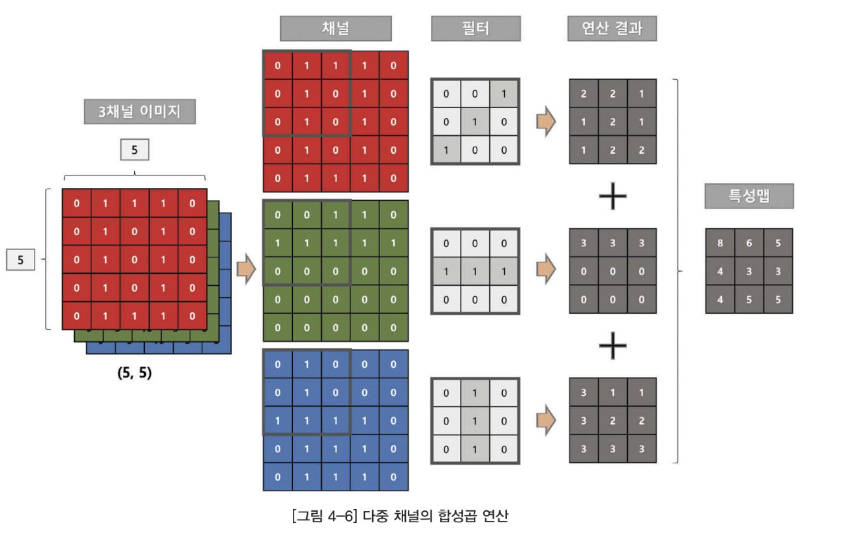

In [76]:
Image("/Users/ijiseon/Desktop/채널.png")

만약 합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면, 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져서 총 60개의 커널이 생성된다. 1개 커널의 사이즈가 3x3으로 설정했다면, (3x3x입력 채널 수x출력 필터 수)=3x3x3개(R, G, B)x20개(출력 필터 수)=540개가 된다. 즉, 해당 층에서 업데이트할 가중치의 그래디언트는 540개가 된다.

여기에 bias가 추가로 계산되는데 20개의 출력 필터 개수만큼 추가된다. 즉, 20개의 bias가 추가되어 총 560개의 파라미터가 업데이트될 파라미터의 개수가 된다.


### > 스트라이드 

커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성 맵에 결과를 채워나간다. 이때 이동하는 간격을 스트라이드(stride)로 정의하며, 주로 1 또는 2로 설정한다.

스트라이드를 1로 설정 시 커널은 우측으로 1픽셀씩 이동하게 되며, 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫 번째 픽셀로 이동하여 추출한다. 스트라이드를 2로 설정하게 되면 2픽셀씩 건너뛰기 때문에 특성 맵의 크기가 1/2씩 줄어들게 된다.


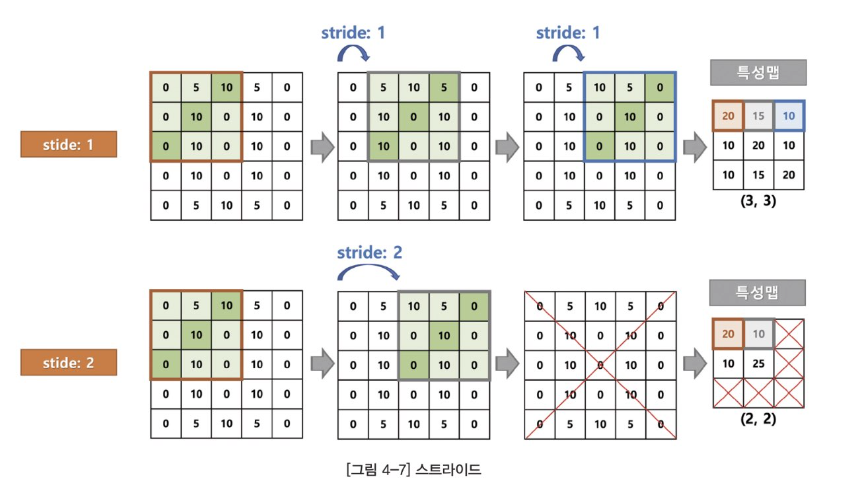

In [77]:
Image("/Users/ijiseon/Desktop/스트라이드.png")

### > 패딩

커널 크기가 3x3이고, 스트라이드에서 1로 설정하게 되는 경우에도 추출된 특성 맵의 사이즈는 입력 이미지 대비 가로로 2픽셀, 세로로 2픽셀씩 줄어들게 된다. 하지만 추출된 특성 맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩(padding)을 설정할 수 있다.

앞의 그림과 같이 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출하게 된다. 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성 맵의 크기가 줄어들지 않는다.


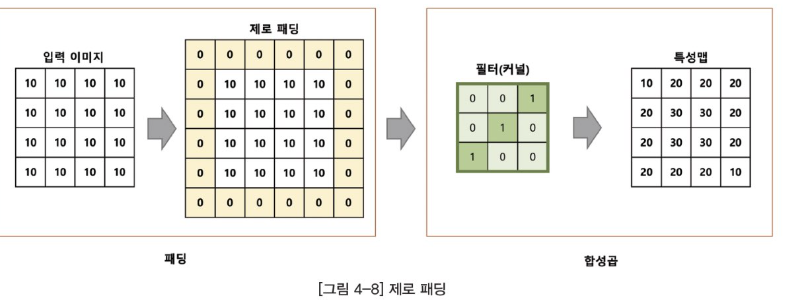

In [78]:
Image("/Users/ijiseon/Desktop/패딩.png")

### > 특성맵 사이즈

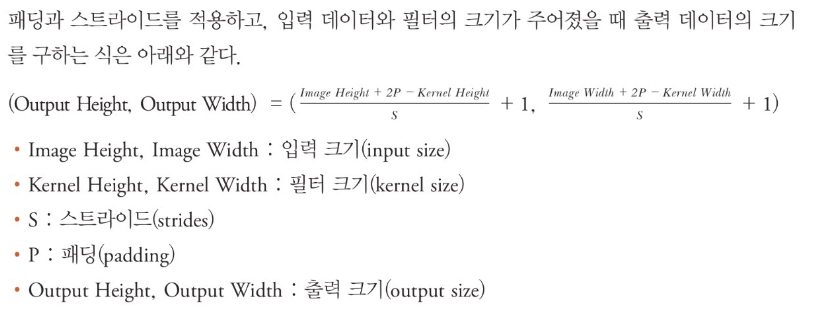

In [79]:
Image("/Users/ijiseon/Desktop/특성맵사이즈.png")

### > 풀링

풀링(pooling) 레이어는 추출된 특성 맵에 대해 다운샘플링하여 이미지의 크기를 축소하는 레이어다. 풀링 레이어를 사용하면서 얻을 수 있는 이점으로는 이미지 축소를 통해 연산량을 감소한다는 점과 과대적합(overfitting)을 방지함에 있다.

풀링 레이어는 크게 최대 풀링(max pooling)과 평균 풀링(average pooling)으로 나뉜다. 최대 풀링은 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었으며 생각보다 좋은 성능을 발휘하기 때문에 합성곱 신경망과 같이 주로 사용된다.


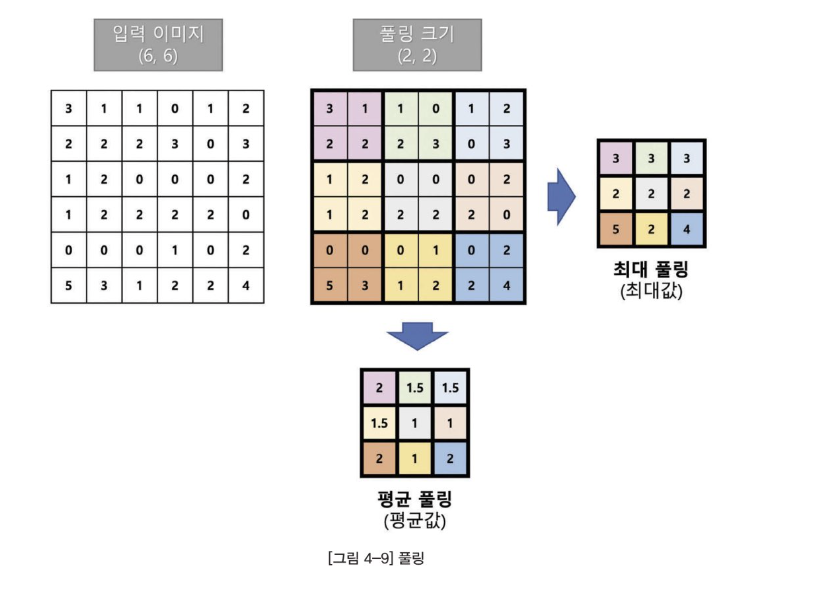

In [80]:
Image("/Users/ijiseon/Desktop/풀링.png")

> ## 간단한 모델 생성

In [1]:
import tensorflow as tf

2024-05-27 15:27:49.992758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
import matplotlib.pylab as plt

def plot_image(data,idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx],cmap="gray")
    plt.axis("off")
    plt.show()

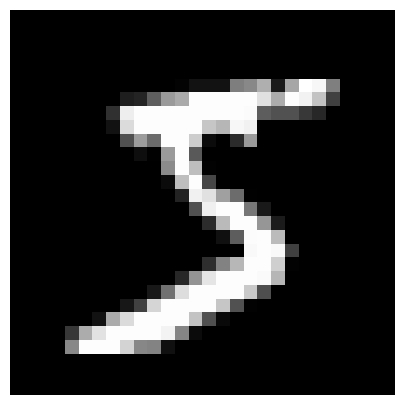

In [7]:
plot_image(x_train,0)

In [11]:
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0 255
0 255


In [12]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.0
0.0 1.0


In [13]:
# 채널추가

print(x_train.shape,x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu",
                          input_shape=(28,28,1),name="conv"),
    
    tf.keras.layers.MaxPooling2D((2,2),name="pool"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax"),
]) 

In [16]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(x_train_in,y_train,
         validation_data=(x_valid_in,y_valid),
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2051 - accuracy: 0.9410 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.0652 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0567 - accuracy: 0.9832 - val_loss: 0.0564 - val_accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0525 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.0487 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0516 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0503 - val_ac

In [17]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9819


[0.059336334466934204, 0.9818999767303467]

In [20]:
def plot_loss_acc(history, epoch):
    
    loss,val_loss = history.history["loss"],history.history["val_loss"]
    acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1,epoch+1), loss, label="Training")
    axes[0].plot(range(1,epoch+1), val_loss, label="Validation")
    axes[0].legend(loc="best")
    axes[0].set_title("Loss")
    
    axes[1].plot(range(1,epoch+1), acc, label="Training")
    axes[1].plot(range(1,epoch+1), val_acc, label="Validation")
    axes[1].legend(loc="best")
    axes[1].set_title("Accuracy")
    
    plt.show()
    

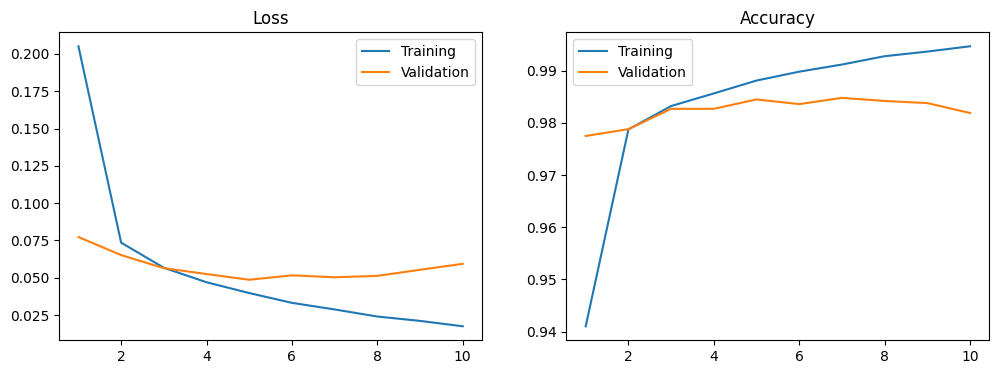

In [21]:
plot_loss_acc(history,10)

In [23]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [25]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [26]:
# 레이어
model.layers

In [27]:
# 첫 번째 레이어 선택
model.layers[0]

In [28]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [29]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [30]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.2961881 ,  0.27329224,  0.45006728,  0.28969967,
            0.48168033, -0.62824947, -0.55443424,  0.2979561 ,
           -0.02289481, -0.01203964, -0.49429393,  0.13080432,
            0.06395741, -0.86452055,  0.0918294 , -0.6745686 ,
           -0.2721556 , -0.9329689 , -0.16734213, -0.1431373 ,
           -0.3902721 , -0.19108015,  0.33902928, -0.9694323 ,
            0.09605692, -0.87546086,  0.2940218 , -0.04279904,
            0.33549124, -1.4210355 ,  0.7755359 , -0.5180461 ]],
 
         [[ 0.7022451 ,  0.08118097, -0.2867175 , -0.18214554,
            0.4468491 ,  0.02954617, -0.23225994,  0.0372648 ,
            0.52327996,  0.3334065 , -0.9554784 ,  0.21418104,
            0.30388704,  0.1850471 ,  0.5545786 ,  0.04082875,
           -0.30303437,  0.17334953, -0.23103265, -0.0433166 ,
           -1.4325987 ,  0.01532808,  0.29534674, -0.6952444 ,
           -0.5035147 , -0.3804473 ,  0.00

In [31]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.2961881 ,  0.27329224,  0.45006728,  0.28969967,
           0.48168033, -0.62824947, -0.55443424,  0.2979561 ,
          -0.02289481, -0.01203964, -0.49429393,  0.13080432,
           0.06395741, -0.86452055,  0.0918294 , -0.6745686 ,
          -0.2721556 , -0.9329689 , -0.16734213, -0.1431373 ,
          -0.3902721 , -0.19108015,  0.33902928, -0.9694323 ,
           0.09605692, -0.87546086,  0.2940218 , -0.04279904,
           0.33549124, -1.4210355 ,  0.7755359 , -0.5180461 ]],

        [[ 0.7022451 ,  0.08118097, -0.2867175 , -0.18214554,
           0.4468491 ,  0.02954617, -0.23225994,  0.0372648 ,
           0.52327996,  0.3334065 , -0.9554784 ,  0.21418104,
           0.30388704,  0.1850471 ,  0.5545786 ,  0.04082875,
          -0.30303437,  0.17334953, -0.23103265, -0.0433166 ,
          -1.4325987 ,  0.01532808,  0.29534674, -0.6952444 ,
          -0.5035147 , -0.3804473 ,  0.0053399 , -0.449251

In [32]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.01249023, -0.20097089, -0.4565691 , -0.28092808, -0.08551117,
       -0.08176181, -0.11880998, -0.30858448, -0.03366765, -0.15890564,
       -0.01156117, -0.18466294, -0.11474069, -0.14742956, -0.00489364,
       -0.13364805, -0.02907651, -0.01525743, -0.26116204, -0.18442614,
       -0.00999627,  0.2640209 , -0.28436577, -0.05817968, -0.10661969,
       -0.10425209, -0.30873674, -0.03180692, -0.18504345, -0.01721823,
        0.00090046, -0.18331426], dtype=float32)>

In [33]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer("conv")

In [35]:
#샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)

activator = tf.keras.Model(inputs=model.input,
                          outputs=[layer.output for layer in model.layers[:2]])

activations = activator.predict(x_train_in[0][tf.newaxis,...])

len(activations)

1/1 [==============================] - 0s 64ms/step


2

In [36]:
#첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

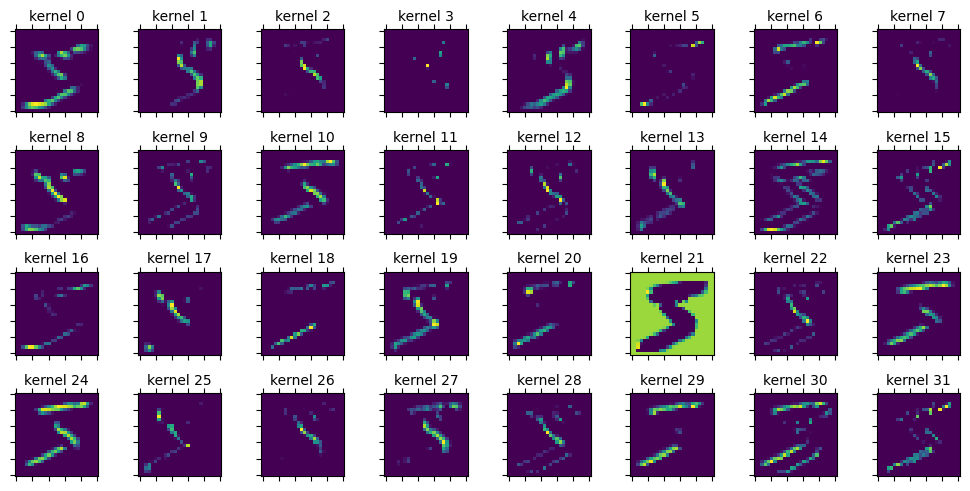

In [38]:
#Convolution 시각화 
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8,i%8].matshow(conv_activation[0,:,:,i],cmap="viridis")
    axes[i//8,i%8].set_title("kernel %s"%str(i), fontsize=10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)
    
plt.tight_layout()
plt.show()

In [39]:
# 두번째 레이어(pool) 출력층

pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


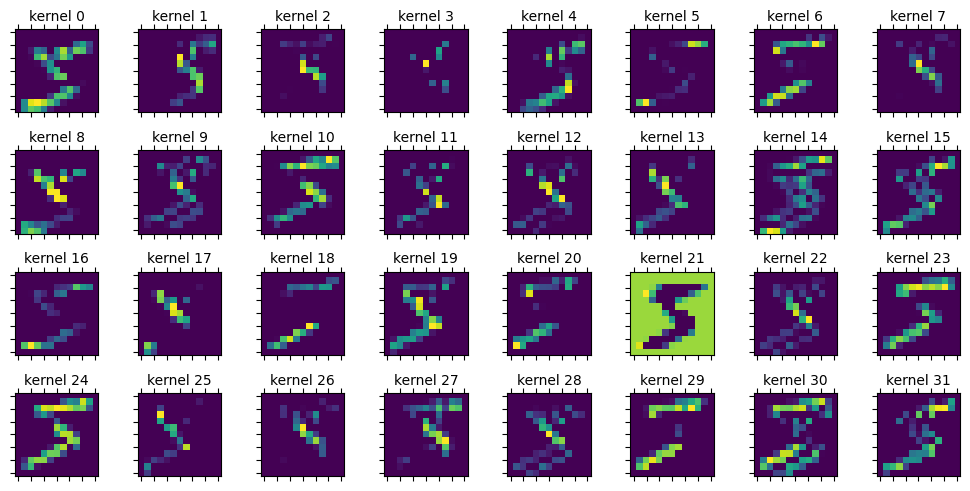

In [40]:
#Convolution 시각화 
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8,i%8].matshow(pooling_activation[0,:,:,i],cmap="viridis")
    axes[i//8,i%8].set_title("kernel %s"%str(i), fontsize=10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)
    
plt.tight_layout()
plt.show()

> ## 복잡한 모델 생성

In [41]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [42]:
# 새로운 출력 값 배열 생성 (홀수:1, 짝수:0)

y_train_odd = []

for y in y_train:
    if y%2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)


In [43]:
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [44]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [46]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2 == 0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [47]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [48]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

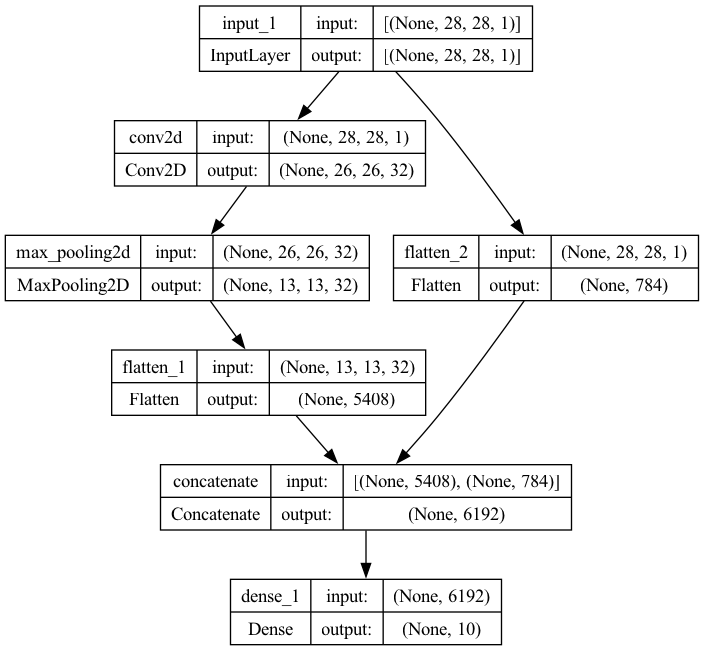

In [49]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [50]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)
     

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2023 - accuracy: 0.9417 - val_loss: 0.0920 - val_accuracy: 0.9723
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0781 - accuracy: 0.9770 - val_loss: 0.0644 - val_accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.0604 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0672 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0554 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0579 - val_ac

In [51]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [52]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


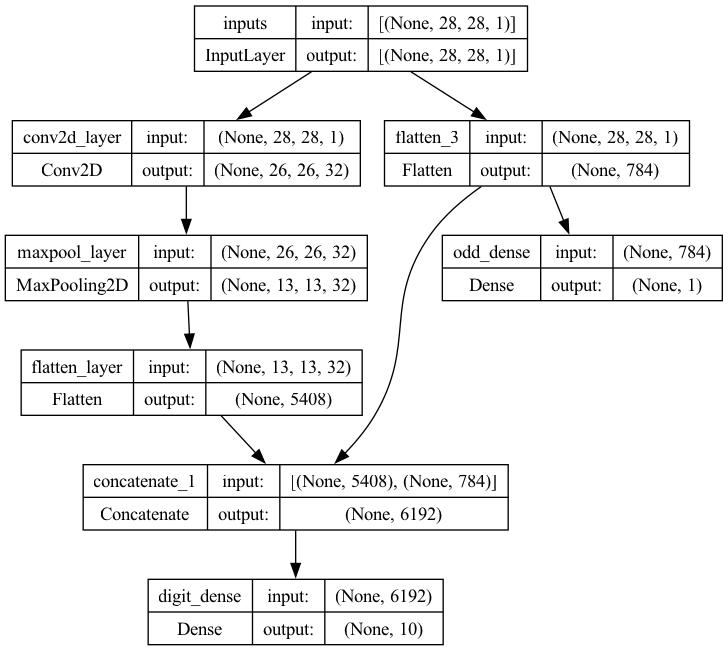

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [54]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1,'odd_dense':0.5}, metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3732 - digit_dense_loss: 0.2106 - odd_dense_loss: 0.3252 - digit_dense_accuracy: 0.9402 - odd_dense_accuracy: 0.8655 - val_loss: 0.2295 - val_digit_dense_loss: 0.0921 - val_odd_dense_loss: 0.2748 - val_digit_dense_accuracy: 0.9713 - val_odd_dense_accuracy: 0.8897
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2149 - digit_dense_loss: 0.0792 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9769 - odd_dense_accuracy: 0.8912 - val_loss: 0.1985 - val_digit_dense_loss: 0.0668 - val_odd_dense_loss: 0.2635 - val_digit_dense_accuracy: 0.9789 - val_odd_dense_accuracy: 0.8961
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1912 - digit_dense_loss: 0.0599 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9817 - odd_dense_accuracy: 0.8958 - val_loss: 0.1906 - val_digit_dense_loss: 0.0600 - val_odd_dense_loss: 0.2614 - val_digit_dense_accuracy: 0.9809 - va

In [55]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 3ms/step - loss: 0.2067 - digit_dense_loss: 0.0789 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9796 - odd_dense_accuracy: 0.9012


[0.2067294418811798,
 0.0788751170039177,
 0.25570860505104065,
 0.9796000123023987,
 0.901199996471405]

In [56]:
# 샘플 이미지 출력
def plot_image(data,idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis('off')
    plt.show()

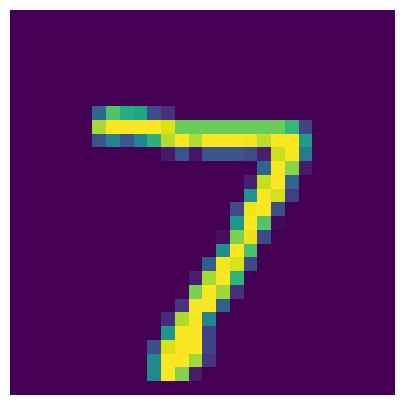

In [57]:
plot_image(x_valid,0)

In [58]:
digit_preds, odd_preds = model.predict(x_valid_in)
# 숫자 7 이미지에 대한 예측 확률
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 3ms/step
[5.0580444e-13 1.1768306e-10 4.3671305e-10 2.4891102e-07 1.6265590e-12
 1.2334337e-12 1.3832881e-21 9.9999970e-01 5.6703902e-11 1.0014897e-09]
[0.99953043]


In [59]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [60]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [61]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


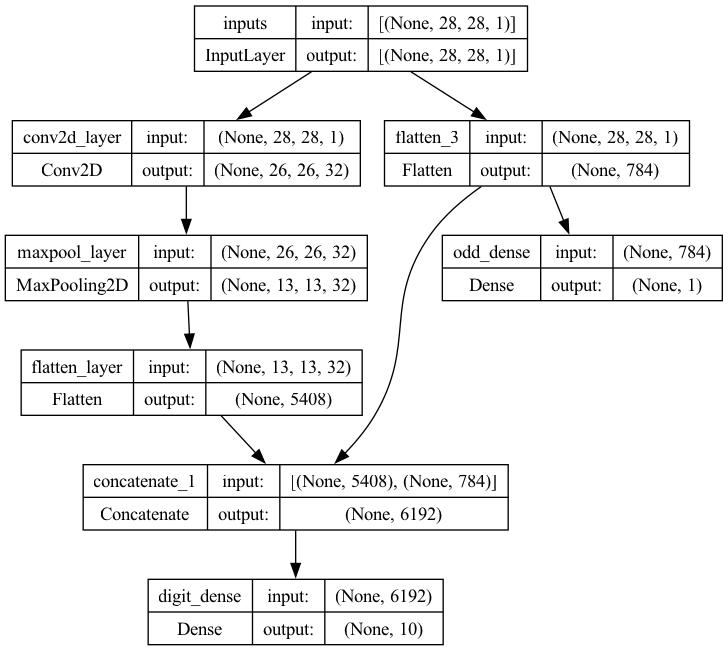

In [62]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [63]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


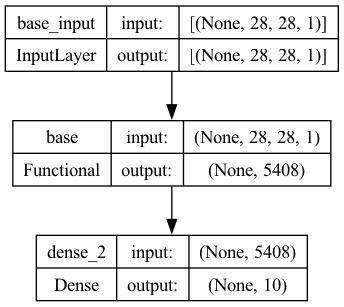

In [64]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

In [65]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1302 - accuracy: 0.9629 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0591 - accuracy: 0.9825 - val_loss: 0.0577 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0561 - val_accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0586 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0529 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0541 - val_ac

In [66]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [67]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, 
                                           outputs=dense_output)

digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [68]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1153 - accuracy: 0.9689 - val_loss: 0.0610 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.0461 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0345 - accuracy: 0.9901 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0508 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.0546 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.0532 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0551 - val_accuracy:

In [69]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [70]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [71]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1153 - accuracy: 0.9692 - val_loss: 0.0582 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0523 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9919 - val_loss: 0.0510 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0549 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0537 - val_accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0516 - val_accuracy: